 ## PROJECT-2 PROPOSAL 
The main dataset I have chosen to analyze is from official website of Global Health Data Exchange http://ghdx.healthdata.org/gbd-results-tool . The data tells number of deaths caused by risk factors (behavioral, environmental, metabolic risks etc.) for countries between 1990-2017. The data is 4.1MB and has 6469 rows and 38 columns. I’ll also get help from an additional dataset which is from official website of The World Bank https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups and shows countries income levels by years. The data is 287KB and has 229 rows and 34 columns. Both of them are free and legal to access. I've used the terms “dataset for death rates, world population dataset” to reach to data sources. After my exploring, I didn't find any cleanup on the data.
https://data.worldbank.org/indicator/SP.POP.TOTL

 I’d like to pose the following hypotheses;
1.	Death rates from obesity in the US are x10 greater than in Ethiopia between 1990-2017 since the US is a high-income country.
2.	Number of deaths by drug use in the US is increased by between 3-5% per year from 2009 through 2017.
3.	Number of deaths by smoking in low-income countries are greater than in high-income countries.
4.	Number of deaths from obesity and high blood sugar in the US are very close each other in the ratio of 80% or greater.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
l = os.listdir(os.getcwd())

l = [i for i in l] #just for "csv" files
l



['PROJECT2.ipynb',
 'number-of-deaths-by-risk-factor.csv',
 '.DS_Store',
 'PROJECT2.HAKAN2.ipynb',
 'worldpopulation.csv',
 '.ipynb_checkpoints',
 'OGHIST-2.xls',
 'PROJECT2.hakan.ipynb',
 'merge123.csv',
 'PROJECT2.PROPOSAL.docx']

In [3]:
df = pd.read_csv('number-of-deaths-by-risk-factor.csv')
df=df.rename(columns={"Entity":"Country Name"})
df1=pd.read_csv('worldpopulation.csv', skiprows=3)
df2 = pd.read_excel('OGHIST-2.xls',sheet_name=2).iloc[6:-2,1:]


In [55]:
df.dtypes

Country Name                                         object
Code                                                 object
Year                                                  int64
Unsafe water source (deaths)                        float64
Poor sanitation (deaths)                            float64
No access to handwashing facility (deaths)          float64
Indoor air pollution (deaths)                       float64
Non-exclusive breastfeeding (deaths)                float64
Discontinued breastfeeding (deaths)                 float64
Child wasting (deaths)                              float64
Child stunting (deaths)                             float64
Low birth weight (deaths)                           float64
Secondhand smoke (deaths)                           float64
Alcohol use (deaths)                                float64
Drug use (deaths)                                   float64
Diet low in fruits (deaths)                         float64
Diet low in vegetables (deaths)         

In [ ]:
df_edit=df.interpolate()
df_edit.head()

In [ ]:
df_edit.isnull().sum()

df_edit.select_dtypes(include = ['float'])
df_edit[df_edit.columns[~df_edit.isnull().any()]]
all_columns = list(df_edit)
df_edit[all_columns] = df_edit[all_columns].astype(int)
df_edit.head()

In [54]:
df1.head()

Country Name       1960       1961       1962       1963       1964  \
0        Aruba    54211.0    55438.0    56225.0    56695.0    57032.0   
1  Afghanistan  8996973.0  9169410.0  9351441.0  9543205.0  9744781.0   
2       Angola  5454933.0  5531472.0  5608539.0  5679458.0  5735044.0   
3      Albania  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   
4      Andorra    13411.0    14375.0    15370.0    16412.0    17469.0   

        1965        1966        1967        1968  ...        2010        2011  \
0    57360.0     57715.0     58055.0     58386.0  ...    101669.0    102046.0   
1  9956320.0  10174836.0  10399926.0  10637063.0  ...  29185507.0  30117413.0   
2  5770570.0   5781214.0   5774243.0   5771652.0  ...  23356246.0  24220661.0   
3  1864791.0   1914573.0   1965598.0   2022272.0  ...   2913021.0   2905195.0   
4    18549.0     19647.0     20758.0     21890.0  ...     84449.0     83747.0   

         2012        2013        2014        2015        2016        2017  \
0    102560.0    103159.0    103774.0    104341.0    104872.0    105366.0   
1  31161376.0  32269589.0  33370794.0  34413603.0  35383128.0  36296400.0   
2  25107931.0  26015780.0  26941779.0  27884381.0  28842484.0  29816748.0   
3   2900401.0   2895092.0   2889104.0   2880703.0   2876101.0   2873457.0   
4     82427.0     80774.0     79213.0     78011.0     77297.0     77001.0   

         2018  2019  
0    105845.0   NaN  
1  37172386.0   NaN  
2  30809762.0   NaN  
3   2866376.0   NaN  
4     77006.0   NaN  

[5 rows x 61 columns]

In [6]:
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
1961                4
1962                4
1963                4
1964                4
1965                4
1966                4
1967                4
1968                4
1969                4
1970                4
1971                4
1972                4
1973                4
1974                4
1975                4
1976                4
1977                4
1978                4
1979                4
1980                4
1981                4
1982                4
1983                4
1984                4
1985                4
                 ... 
1991                2
1992                3
1993                3
1994                3
1995                2
1996                2
1997                2
1998                1
1999                1
2000                1
2001                1
2002                1
2003                1
2004                1
2005      

In [5]:
df1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [7]:
df1=df1.drop(['Country Code','Indicator Name','Indicator Code','Unnamed: 64'],axis=1)
df1.head()

Country Name       1960       1961       1962       1963       1964  \
0        Aruba    54211.0    55438.0    56225.0    56695.0    57032.0   
1  Afghanistan  8996973.0  9169410.0  9351441.0  9543205.0  9744781.0   
2       Angola  5454933.0  5531472.0  5608539.0  5679458.0  5735044.0   
3      Albania  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   
4      Andorra    13411.0    14375.0    15370.0    16412.0    17469.0   

        1965        1966        1967        1968  ...        2010        2011  \
0    57360.0     57715.0     58055.0     58386.0  ...    101669.0    102046.0   
1  9956320.0  10174836.0  10399926.0  10637063.0  ...  29185507.0  30117413.0   
2  5770570.0   5781214.0   5774243.0   5771652.0  ...  23356246.0  24220661.0   
3  1864791.0   1914573.0   1965598.0   2022272.0  ...   2913021.0   2905195.0   
4    18549.0     19647.0     20758.0     21890.0  ...     84449.0     83747.0   

         2012        2013        2014        2015        2016        2017  \
0    102560.0    103159.0    103774.0    104341.0    104872.0    105366.0   
1  31161376.0  32269589.0  33370794.0  34413603.0  35383128.0  36296400.0   
2  25107931.0  26015780.0  26941779.0  27884381.0  28842484.0  29816748.0   
3   2900401.0   2895092.0   2889104.0   2880703.0   2876101.0   2873457.0   
4     82427.0     80774.0     79213.0     78011.0     77297.0     77001.0   

         2018  2019  
0    105845.0   NaN  
1  37172386.0   NaN  
2  30809762.0   NaN  
3   2866376.0   NaN  
4     77006.0   NaN  

[5 rows x 61 columns]

In [14]:
df1_tidy = pd.melt(df1,['Country Name'], var_name="Year", value_name="Population")
df1_tidy.head()

Country Name  Year  Population
0        Aruba  1960     54211.0
1  Afghanistan  1960   8996973.0
2       Angola  1960   5454933.0
3      Albania  1960   1608800.0
4      Andorra  1960     13411.0

In [15]:
df1_tidy['Year'] = df1_tidy['Year'].astype(int)
df1_tidy['Population']=df1_tidy['Population'].astype('Int64')
df1_tidy.head()

Country Name  Year  Population
0        Aruba  1960       54211
1  Afghanistan  1960     8996973
2       Angola  1960     5454933
3      Albania  1960     1608800
4      Andorra  1960       13411

In [59]:
start_year=1989
end_year=2017
mask = (df1_tidy['Year'] > start_year) & (df1_tidy['Year'] <= end_year)
df1_population = df1_tidy.loc[mask]
df1_population.head()

Country Name  Year  Population
7920        Aruba  1990       62149
7921  Afghanistan  1990    12412308
7922       Angola  1990    11848386
7923      Albania  1990     3286542
7924      Andorra  1990       54509

In [18]:
#detect missing values 
df1_population.isnull().sum()

Country Name     0
Year             0
Population      45
dtype: int64

In [32]:
df1_miss = df1_population[df1_population.isna().any(axis=1)]
df1_miss

Country Name  Year  Population
8028              Not classified  1990         NaN
8143   Sint Maarten (Dutch part)  1990         NaN
8292              Not classified  1991         NaN
8407   Sint Maarten (Dutch part)  1991         NaN
8556              Not classified  1992         NaN
8573                      Kuwait  1992         NaN
8671   Sint Maarten (Dutch part)  1992         NaN
8820              Not classified  1993         NaN
8837                      Kuwait  1993         NaN
8935   Sint Maarten (Dutch part)  1993         NaN
9084              Not classified  1994         NaN
9101                      Kuwait  1994         NaN
9199   Sint Maarten (Dutch part)  1994         NaN
9348              Not classified  1995         NaN
9463   Sint Maarten (Dutch part)  1995         NaN
9612              Not classified  1996         NaN
9727   Sint Maarten (Dutch part)  1996         NaN
9876              Not classified  1997         NaN
9991   Sint Maarten (Dutch part)  1997         NaN
10140             Not classified  1998         NaN
10404             Not classified  1999         NaN
10668             Not classified  2000         NaN
10932             Not classified  2001         NaN
11196             Not classified  2002         NaN
11460             Not classified  2003         NaN
11724             Not classified  2004         NaN
11988             Not classified  2005         NaN
12252             Not classified  2006         NaN
12516             Not classified  2007         NaN
12780             Not classified  2008         NaN
13044             Not classified  2009         NaN
13308             Not classified  2010         NaN
13572             Not classified  2011         NaN
13795                    Eritrea  2012         NaN
13836             Not classified  2012         NaN
14059                    Eritrea  2013         NaN
14100             Not classified  2013         NaN
14323                    Eritrea  2014         NaN
14364             Not classified  2014         NaN
14587                    Eritrea  2015         NaN
14628             Not classified  2015         NaN
14851                    Eritrea  2016         NaN
14892             Not classified  2016         NaN
15115                    Eritrea  2017         NaN
15156             Not classified  2017         NaN

In [33]:
#see if the entire column is emtpy
df1_population.isnull().sum()==df1_population.shape[0]

Country Name    False
Year            False
Population      False
dtype: bool

In [22]:
df2.head()

Bank's fiscal year: FY89 FY90 FY91 FY92 FY93 FY94 FY95 FY96 FY97  ... FY11  \
6          Afghanistan    L    L    L    L    L    L    L    L    L  ...    L   
7              Albania   ..   ..   ..   LM   LM   LM    L    L    L  ...   UM   
8              Algeria   UM   UM   LM   LM   LM   LM   LM   LM   LM  ...   UM   
9       American Samoa    H    H    H   UM   UM   UM   UM   UM   UM  ...   UM   
10             Andorra   ..   ..   ..    H    H    H    H    H    H  ...    H   

   FY12 FY13 FY14 FY15 FY16 FY17 FY18 FY19 FY20  
6     L    L    L    L    L    L    L    L    L  
7    UM   LM   UM   UM   UM   UM   UM   UM   UM  
8    UM   UM   UM   UM   UM   UM   UM   UM   UM  
9    UM   UM   UM   UM   UM   UM   UM   UM   UM  
10    H    H    H    H    H    H    H    H    H  

[5 rows x 33 columns]

In [23]:
df2.rename(columns={"Bank's fiscal year:":"Country Name"})
cols = list(range(1987,2019))
cols.insert(0,'Country Name')
df2.columns = cols
df2.head()

Country Name 1987 1988 1989 1990 1991 1992 1993 1994 1995  ... 2009  \
6      Afghanistan    L    L    L    L    L    L    L    L    L  ...    L   
7          Albania   ..   ..   ..   LM   LM   LM    L    L    L  ...   UM   
8          Algeria   UM   UM   LM   LM   LM   LM   LM   LM   LM  ...   UM   
9   American Samoa    H    H    H   UM   UM   UM   UM   UM   UM  ...   UM   
10         Andorra   ..   ..   ..    H    H    H    H    H    H  ...    H   

   2010 2011 2012 2013 2014 2015 2016 2017 2018  
6     L    L    L    L    L    L    L    L    L  
7    UM   LM   UM   UM   UM   UM   UM   UM   UM  
8    UM   UM   UM   UM   UM   UM   UM   UM   UM  
9    UM   UM   UM   UM   UM   UM   UM   UM   UM  
10    H    H    H    H    H    H    H    H    H  

[5 rows x 33 columns]

In [24]:
df2.drop(df2[[1987,1988,1989,2018]],axis=1,inplace=True)

In [30]:
df2_income = pd.melt(df2,["Country Name"], var_name="Year", value_name="Income Level")
df2_income.head()

Country Name  Year Income Level
0     Afghanistan  1990            L
1         Albania  1990           LM
2         Algeria  1990           LM
3  American Samoa  1990           UM
4         Andorra  1990            H

In [60]:
df_merge1= pd.merge(df,df1_population,on=['Year','Country Name'])
df_merge1.dtypes

Country Name                                         object
Code                                                 object
Year                                                  int64
Unsafe water source (deaths)                        float64
Poor sanitation (deaths)                            float64
No access to handwashing facility (deaths)          float64
Indoor air pollution (deaths)                       float64
Non-exclusive breastfeeding (deaths)                float64
Discontinued breastfeeding (deaths)                 float64
Child wasting (deaths)                              float64
Child stunting (deaths)                             float64
Low birth weight (deaths)                           float64
Secondhand smoke (deaths)                           float64
Alcohol use (deaths)                                float64
Drug use (deaths)                                   float64
Diet low in fruits (deaths)                         float64
Diet low in vegetables (deaths)         

In [35]:
df_merge1.isnull().sum()

Country Name                                           0
Code                                                  84
Year                                                   0
Unsafe water source (deaths)                           0
Poor sanitation (deaths)                               0
No access to handwashing facility (deaths)             0
Indoor air pollution (deaths)                          0
Non-exclusive breastfeeding (deaths)                   0
Discontinued breastfeeding (deaths)                    0
Child wasting (deaths)                                 0
Child stunting (deaths)                                0
Low birth weight (deaths)                              0
Secondhand smoke (deaths)                              0
Alcohol use (deaths)                                   0
Drug use (deaths)                                      0
Diet low in fruits (deaths)                            0
Diet low in vegetables (deaths)                        0
Unsafe sex (deaths)            

In [40]:
null_columns=df_merge1.columns[df_merge1.isnull().any()]
print(df_merge1[df_merge1["Population"].isnull()][null_columns])


     Code  High cholesterol (deaths)  Population
1422  ERI                        NaN         NaN
1423  ERI                        NaN         NaN
1424  ERI                        NaN         NaN
1425  ERI                        NaN         NaN
1426  ERI                 722.026352         NaN
1427  ERI                        NaN         NaN
2354  KWT                        NaN         NaN
2355  KWT                        NaN         NaN
2356  KWT                        NaN         NaN


In [ ]:
df_merge1.to_csv('merge123.csv') 

In [52]:
df_merge2 = pd.merge(df_merge1,df2_income,on=['Year','Country Name'])
df_merge2.dtypes

Country Name                                         object
Code                                                 object
Year                                                 object
Unsafe water source (deaths)                        float64
Poor sanitation (deaths)                            float64
No access to handwashing facility (deaths)          float64
Indoor air pollution (deaths)                       float64
Non-exclusive breastfeeding (deaths)                float64
Discontinued breastfeeding (deaths)                 float64
Child wasting (deaths)                              float64
Child stunting (deaths)                             float64
Low birth weight (deaths)                           float64
Secondhand smoke (deaths)                           float64
Alcohol use (deaths)                                float64
Drug use (deaths)                                   float64
Diet low in fruits (deaths)                         float64
Diet low in vegetables (deaths)         

In [42]:
df_merge2.isnull().sum()

Country Name                                           0
Code                                                   0
Year                                                   0
Unsafe water source (deaths)                           0
Poor sanitation (deaths)                               0
No access to handwashing facility (deaths)             0
Indoor air pollution (deaths)                          0
Non-exclusive breastfeeding (deaths)                   0
Discontinued breastfeeding (deaths)                    0
Child wasting (deaths)                                 0
Child stunting (deaths)                                0
Low birth weight (deaths)                              0
Secondhand smoke (deaths)                              0
Alcohol use (deaths)                                   0
Drug use (deaths)                                      0
Diet low in fruits (deaths)                            0
Diet low in vegetables (deaths)                        0
Unsafe sex (deaths)            

# 1.Death rates from obesity in the US are x10 greater than in Ethiopia between 1990-2017 since the US is a high-income country.

In [ ]:
df_merge2['Obesity (deaths)'] = df_merge2['Obesity (deaths)'].astype(int)

In [ ]:
merge2_copy=df_merge2.copy()

In [ ]:
merge2_copy.set_index(['Country Name','Year'], inplace=True)
eth_usa=merge2_copy.loc[['Ethiopia','United States'],['Population','Obesity (deaths)']]

In [ ]:
eth_usa.head()

In [ ]:
eth_usa['Death Rate'] = (eth_usa['Obesity (deaths)'] / eth_usa['Population'])*100000


In [ ]:
eth_usa.head()

In [ ]:
eth = eth_usa.reset_index()[eth_usa.reset_index()['Country Name'].str.startswith('E')]
usa = eth_usa.reset_index()[eth_usa.reset_index()['Country Name'].str.startswith('U')]
eth_usa_last=pd.concat(eth.year,usa.year)
eth_usa_last

In [ ]:
eth_usa_last['USA-ETH'] = eth_usa_last['Death Rate_y'] / eth_usa_last['Death Rate_x']

In [ ]:
eth_usa_last

In [ ]:
list(eth_usa_last.columns)

In [ ]:
ax = sns.barplot(x="Year", y="USA-ETH", data=eth_usa_last)

# 2.Number of deaths by drug use in the US is increased by between 3-5% per year from 2009 through 2017.

In [50]:
merge1_copy=df_merge1.copy()
merge1_copy.head()

Country Name Code  Year  Unsafe water source (deaths)  \
0  Afghanistan  AFG  1990                   7554.049543   
1  Afghanistan  AFG  1991                   7359.676749   
2  Afghanistan  AFG  1992                   7650.437822   
3  Afghanistan  AFG  1993                  10270.731383   
4  Afghanistan  AFG  1994                  11409.177112   

   Poor sanitation (deaths)  No access to handwashing facility (deaths)  \
0               5887.747628                                 5412.314513   
1               5732.770160                                 5287.891103   
2               5954.804987                                 5506.657363   
3               7986.736613                                 7104.620351   
4               8863.010065                                 8051.515953   

   Indoor air pollution (deaths)  Non-exclusive breastfeeding (deaths)  \
0                   22388.497233                           3221.138842   
1                   22128.758206                           3150.559597   
2                   22873.768789                           3331.349048   
3                   25599.756284                           4477.006100   
4                   28013.167200                           5102.622054   

   Discontinued breastfeeding (deaths)  Child wasting (deaths)  ...  \
0                           156.097553            22778.849249  ...   
1                           151.539851            22292.691113  ...   
2                           156.609194            23102.197940  ...   
3                           206.834451            27902.669960  ...   
4                           233.930571            32929.005932  ...   

   Outdoor air pollution (deaths)  Diet low in fiber (deaths)  \
0                         4383.83                 2864.234512   
1                         4426.36                 2974.479775   
2                         4568.91                 3168.591633   
3                         5080.29                 3401.045056   
4                         5499.23                 3599.709735   

   Diet high in sodium (deaths)  Diet low in legumes (deaths)  \
0                   2737.197934                   3418.965194   
1                   2741.184956                   3457.398250   
2                   2798.560245                   3586.490291   
3                   2853.301679                   3746.266658   
4                   2880.025765                   3869.288402   

   Diet low in calcium (deaths)  Diet high in red meat (deaths)  \
0                    181.287701                        0.220484   
1                    184.251584                        0.184714   
2                    191.318450                        0.151354   
3                    199.767293                        0.109392   
4                    206.619714                        0.059103   

   Diet low in whole grains (deaths)  Diet low in nuts and seeds (deaths)  \
0                       11381.377345                          7299.867330   
1                       11487.832390                          7386.764303   
2                       11866.235572                          7640.628526   
3                       12335.961682                          7968.311853   
4                       12672.950191                          8244.368430   

   Diet low in seafood omega-3 fatty acids (deaths)  Population  
0                                       6456.565238    12412308  
1                                       6511.344276    13299017  
2                                       6703.095594    14485546  
3                                       6946.196824    15816603  
4                                       7138.030745    17075727  

[5 rows x 39 columns]

In [46]:
merge1_copy.dtypes

Country Name                                         object
Code                                                 object
Year                                                  int64
Unsafe water source (deaths)                        float64
Poor sanitation (deaths)                            float64
No access to handwashing facility (deaths)          float64
Indoor air pollution (deaths)                       float64
Non-exclusive breastfeeding (deaths)                float64
Discontinued breastfeeding (deaths)                 float64
Child wasting (deaths)                              float64
Child stunting (deaths)                             float64
Low birth weight (deaths)                           float64
Secondhand smoke (deaths)                           float64
Alcohol use (deaths)                                float64
Drug use (deaths)                                   float64
Diet low in fruits (deaths)                         float64
Diet low in vegetables (deaths)         

In [61]:
merge1_copy.set_index(['Country Name','Year'], inplace=True)
usa_drugs=merge1_copy.loc[['United States'],['Population','Drug use (deaths)']]
usa_drugs.head()

Population  Drug use (deaths)
Country Name  Year                               
United States 1990   249623000       24517.169632
              1991   252981000       25833.051323
              1992   256514000       27101.974683
              1993   259919000       29115.602798
              1994   263126000       30662.292907

In [62]:
usa_drugs['Drug use (deaths)'] = usa_drugs['Drug use (deaths)'].astype(int)

In [63]:
usa_drugs

Population  Drug use (deaths)
Country Name  Year                               
United States 1990   249623000              24517
              1991   252981000              25833
              1992   256514000              27101
              1993   259919000              29115
              1994   263126000              30662
              1995   266278000              31850
              1996   269394000              31248
              1997   272657000              30538
              1998   275854000              31305
              1999   279040000              33198
              2000   282162411              35084
              2001   284968955              37397
              2002   287625193              40181
              2003   290107933              42627
              2004   292805298              44389
              2005   295516599              47709
              2006   298379912              50490
              2007   301231207              52807
              2008   304093966              55645
              2009   306771529              59052
              2010   309326085              62386
              2011   311580009              67078
              2012   313874218              71606
              2013   316057727              77069
              2014   318386421              83691
              2015   320742673              91649
              2016   323071342             101170
              2017   325147121             104937

In [73]:
usa_drugs["Percentage of Difference"] = usa_drugs["Drug use (deaths)"].pct_change(axis=0,fill_method='bfill')*100
usa_drugs

Population  Drug use (deaths)  Difference  \
Country Name  Year                                              
United States 1990   249623000              24517         NaN   
              1991   252981000              25833    5.367704   
              1992   256514000              27101    4.908450   
              1993   259919000              29115    7.431460   
              1994   263126000              30662    5.313412   
              1995   266278000              31850    3.874503   
              1996   269394000              31248   -1.890110   
              1997   272657000              30538   -2.272145   
              1998   275854000              31305    2.511625   
              1999   279040000              33198    6.046957   
              2000   282162411              35084    5.681065   
              2001   284968955              37397    6.592749   
              2002   287625193              40181    7.444447   
              2003   290107933              42627    6.087454   
              2004   292805298              44389    4.133530   
              2005   295516599              47709    7.479330   
              2006   298379912              50490    5.829089   
              2007   301231207              52807    4.589028   
              2008   304093966              55645    5.374287   
              2009   306771529              59052    6.122742   
              2010   309326085              62386    5.645871   
              2011   311580009              67078    7.520918   
              2012   313874218              71606    6.750350   
              2013   316057727              77069    7.629249   
              2014   318386421              83691    8.592300   
              2015   320742673              91649    9.508788   
              2016   323071342             101170   10.388548   
              2017   325147121             104937    3.723436   

                    Percentage of Difference  
Country Name  Year                            
United States 1990                       NaN  
              1991                  5.367704  
              1992                  4.908450  
              1993                  7.431460  
              1994                  5.313412  
              1995                  3.874503  
              1996                 -1.890110  
              1997                 -2.272145  
              1998                  2.511625  
              1999                  6.046957  
              2000                  5.681065  
              2001                  6.592749  
              2002                  7.444447  
              2003                  6.087454  
              2004                  4.133530  
              2005                  7.479330  
              2006                  5.829089  
              2007                  4.589028  
              2008                  5.374287  
              2009                  6.122742  
              2010                  5.645871  
              2011                  7.520918  
              2012                  6.750350  
              2013                  7.629249  
              2014                  8.592300  
              2015                  9.508788  
              2016                 10.388548  
              2017                  3.723436

TypeError: bar() missing 1 required positional argument: 'height'

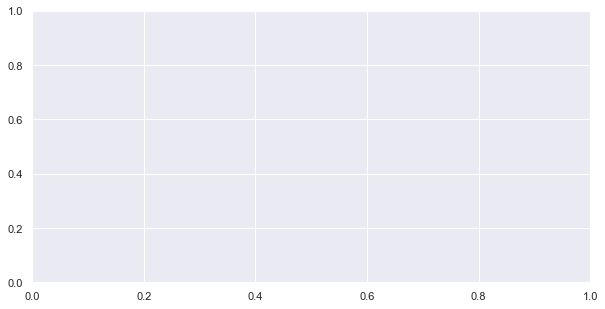

In [88]:
f, ax = plt.subplots(1, figsize=(10,5))
ax.bar(usa_drugs['Percentage of Difference'])
plt.xticks(tick_pos, usa_drug['Year'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")